# Examples of usage of `BigBrother`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from tkinter import Tk, filedialog
from BigBrother import (
    rotation_matrix,
    plane_stress_matrix,
    average_rosette,
    straindf,
    stressdf,
    read,
    MeanBrother,
    BigBrother,
    lowfilter
)

angles = (45, 90, 135)
amplification = -5000e-6
E = 2.59e9
nu = 0.35

# Choosing the file

In [2]:
Tk().withdraw()
file = filedialog.askopenfilename()

What the data looks like

INFO 2024-06-04 17:35:52,007: Reading the DataFrame.
WARNING 2024-06-04 17:36:08,512: Default channels are used.
	=> gauge_channels = [['Ch01', 'Ch02', 'Ch03'], ['Ch05', 'Ch06', 'Ch07'], ['Ch09', 'Ch10', 'Ch11'], ['Ch13', 'Ch14', 'Ch15'], ['Ch17', 'Ch18', 'Ch19']]
INFO 2024-06-04 17:36:09,304: Smoothing DataFrame.
	=> sample_frequency = 1000.0
	=> cutoff = 5


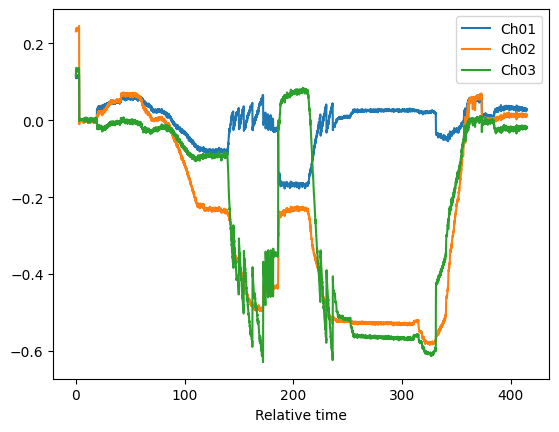

In [3]:
tensiondf = read(file, sep=";", skiprows=list(range(7))+[8])
if tensiondf.size > 1e6:
    slice = tensiondf.size // 100_000
else:
    slice = 1
tensiondf = pd.DataFrame.from_dict({col: tensiondf[col][::10] for col in tensiondf.columns})
tensiondf = lowfilter(tensiondf, cutoff=5, N=2)
tensiondf.plot(x="Relative time", y=["Ch01", "Ch02", "Ch03"])
plt.show()

How the strains look like

INFO 2024-06-04 17:36:10,813: Computing all strains.
	=> amplification factor = -0.005
	=> angles = (45, 90, 135)
	=> gauge_channels = None


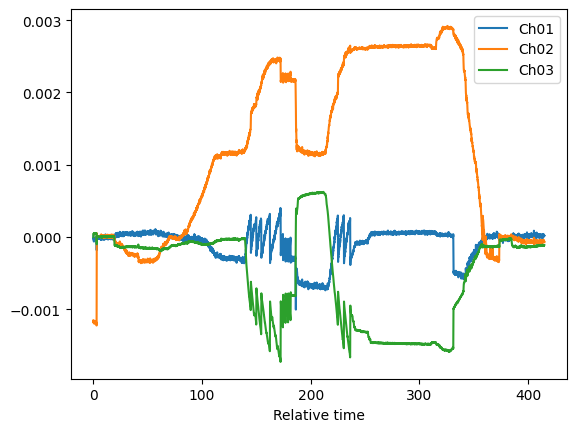

In [4]:
strains = straindf(tensiondf, angles, amplification)
strains.plot(x="Relative time", y=["Ch01", "Ch02", "Ch03"])
plt.show()

How the stresses look like

INFO 2024-06-04 17:36:12,283: INFO: Computing all stresses.
	=> E, nu = (2590000000.0, 0.35)


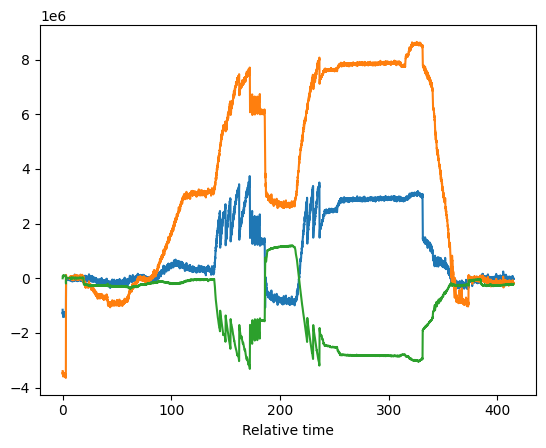

In [5]:
stresses = stressdf(strains, E, nu)
stresses.plot(x="Relative time", y=["Ch01", "Ch02", "Ch03"], legend=False)
plt.show()

INFO 2024-06-04 17:36:14,760: Time to plots the averaged stresses and strains.


(<Figure size 640x480 with 2 Axes>,
 (<Axes: ylabel='Déformation [%]'>,
  <Axes: xlabel='temps [s]', ylabel='Contrainte [MPa]'>))

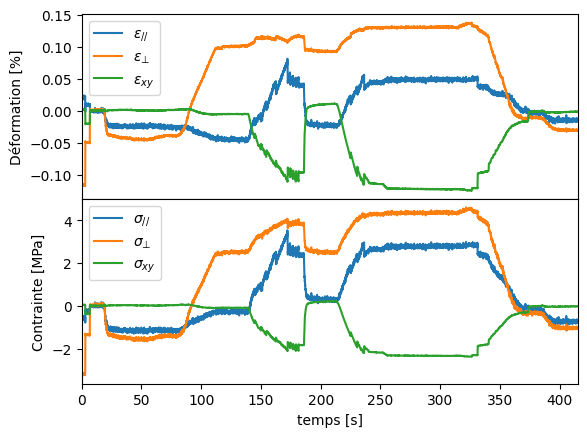

In [6]:
stresses_avg = average_rosette(stresses)
strains_avg = average_rosette(strains)

MeanBrother(strains_avg, stresses_avg)

INFO 2024-06-04 17:36:17,489: Time to plots all gauges separately.


(<Figure size 1000x500 with 10 Axes>,
 array([[<Axes: title={'center': 'Rosette 1'}, ylabel='Déformation [%]'>,
         <Axes: title={'center': 'Rosette 2'}>,
         <Axes: title={'center': 'Rosette 3'}>,
         <Axes: title={'center': 'Rosette 4'}>,
         <Axes: title={'center': 'Rosette 5'}>],
        [<Axes: xlabel='temps [s]', ylabel='Contrainte [MPa]'>, <Axes: >,
         <Axes: >, <Axes: >, <Axes: >]], dtype=object))

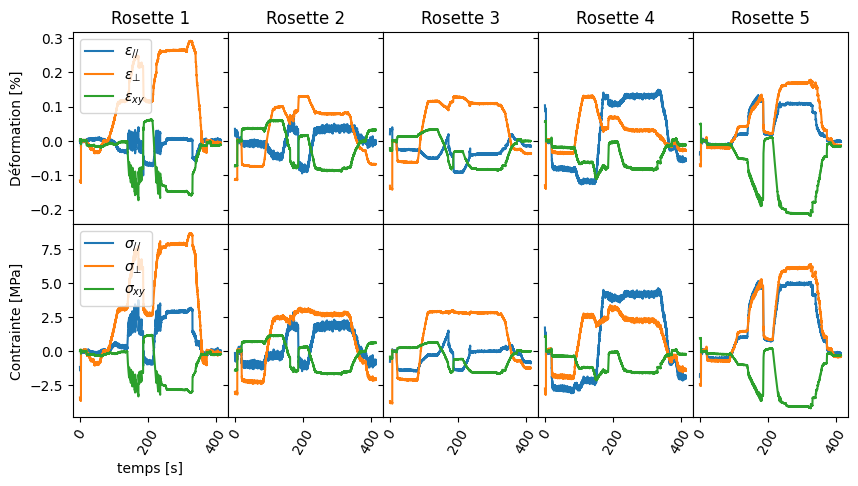

In [7]:
BigBrother(strains, stresses)